In [1]:
from collections import Counter
import ast
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-2])
DATA_PATH = f'{ROOT_PATH}/Dataset/movies/data.csv'

In [3]:
df        = pd.read_csv(DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [4]:
df.Certification = df.Certification.fillna('Not Rated')
df.Gross         = df.Gross.fillna(0)

df.Description   = df.Description.apply(lambda    x: ' '.join(ast.literal_eval(x)))
df.Director      = df.Director.apply(lambda       x: ast.literal_eval(x))
df.Genre         = df.Genre.apply(lambda          x: ' '.join(ast.literal_eval(x)))
df.Stars         = df.Stars.apply(lambda          x: ast.literal_eval(x))

df = df.drop('MetaScore', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   Gross                10000 non-null  float64
 7   Genre                10000 non-null  object 
 8   Certification        10000 non-null  object 
 9   Director             10000 non-null  object 
 10  Stars                10000 non-null  object 
 11  Description          10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [5]:
df.sample(3).T

,7292,3531,9955
Unnamed: 0,7292,3531,9955
Movie Name,Party Monster,I'm Your Man,The Crow: Salvation
Year of Release,2003,2021,2000
Run Time in minutes,98,108,102
Movie Rating,6.2,7.1,4.9
Votes,16894,11549,12015
Gross,730000.0,0.0,0.0
Genre,Biography Crime Drama,Comedy Drama Romance,Action Crime Fantasy
Certification,R,R,R
Director,"[Fenton Bailey, Randy Barbato]",[Maria Schrader],[Bharat Nalluri]


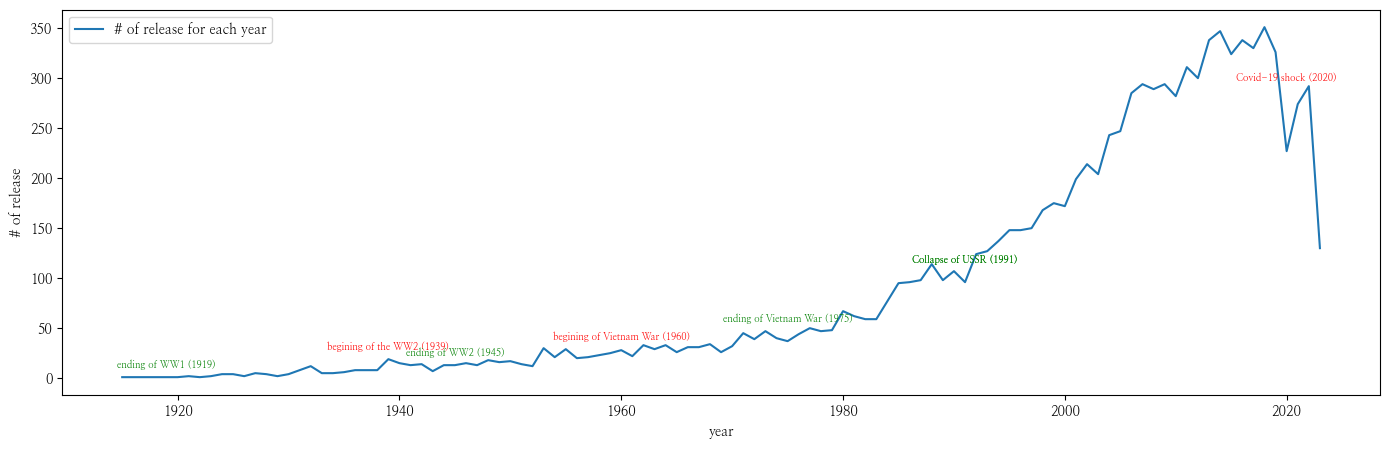

In [6]:
years = dict(df['Year of Release'].value_counts())
years = dict(sorted(years.items()))

plt.figure(figsize = (17, 5))
plt.plot(years.keys(), years.values(), label = '# of release for each year')
plt.text(1919, years[1919] + 10, 'ending of WW1 (1919)',
        fontsize = 7, color = 'green', ha = 'center')
plt.text(1939, years[1939] + 10, 'begining of the WW2 (1939)',
         fontsize = 7, color = 'red', ha = 'center')
plt.text(1945, years[1945] + 10, 'ending of WW2 (1945)',
         fontsize = 7, color = 'green', ha = 'center')
plt.text(1960, years[1960] + 10, 'begining of Vietnam War (1960)',
         fontsize = 7, color = 'red', ha = 'center')
plt.text(1975, years[1975] + 20, 'ending of Vietnam War (1975)',
         fontsize = 7, color = 'green', ha = 'center')
plt.text(1991, years[1991] + 20, 'Collapse of USSR (1991)',
         fontsize = 7, color = 'green', ha = 'center')
plt.text(1991, years[1991] + 20, 'Collapse of USSR (1991)',
         fontsize = 7, color = 'green', ha = 'center')
plt.text(2020, years[2020] + 70, 'Covid-19 shock (2020)',
         fontsize = 7, color = 'red', ha = 'center')

plt.xlabel('year')
plt.ylabel('# of release')
plt.legend()

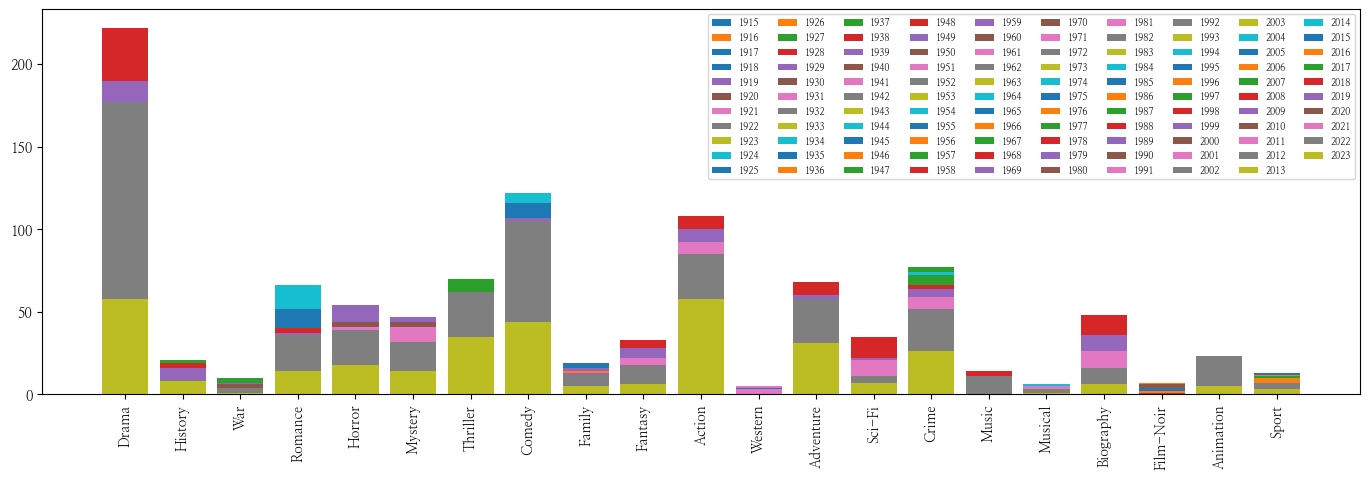

In [7]:
genre_each_years   = [df[df['Year of Release'] == year].Genre for year in range(1915, 2024)]
plt.figure(figsize = (17, 5))
for idx, year in zip(range(1915, 2024), genre_each_years):

    genres = []
    for genre in year: genres.extend(genre.split())

    genre_cnt = Counter(genres)
    plt.bar(genre_cnt.keys(), genre_cnt.values(), label = f'{idx}')
    plt.xticks(rotation = 90)
    plt.legend(ncol = 10, prop = {'size' : 6.8})

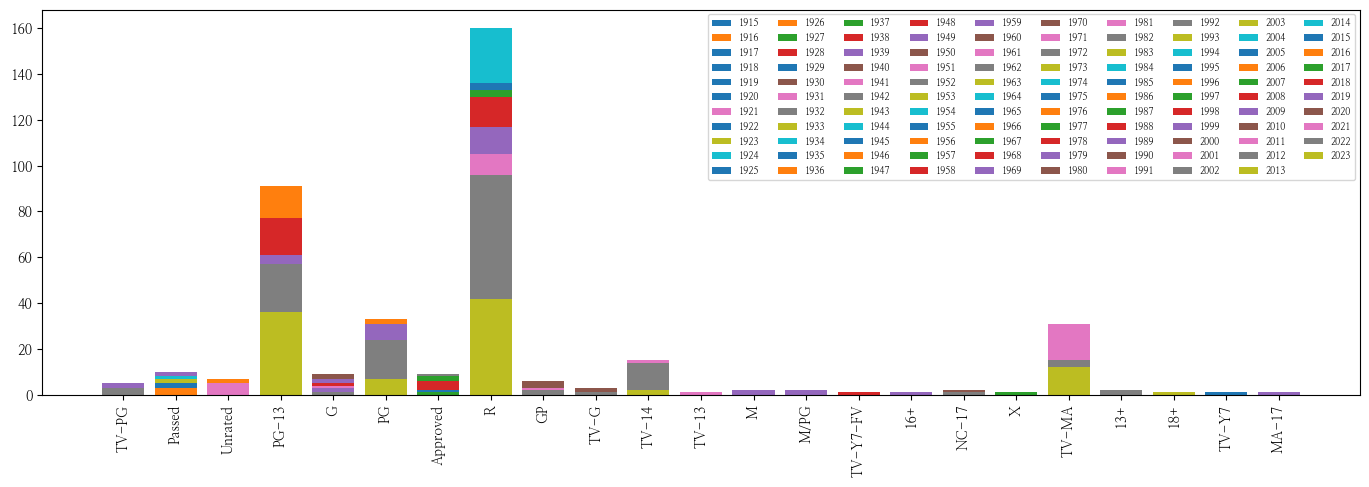

In [8]:
genre_each_grade   = [df[df['Year of Release'] == year].Certification for year in range(1915, 2024)]
plt.figure(figsize = (17, 5))

for idx, year in zip(range(1915, 2024), genre_each_grade):

    grades = []
    for grade in year: 

        if 'Not Rated' in grade: continue
        grades.append(grade)

    grade_cnt = Counter(grades)
    plt.bar(grade_cnt.keys(), grade_cnt.values(), label = f'{idx}')
    plt.xticks(rotation = 90)
    plt.legend(ncol = 10, prop = {'size' : 6.8})

In [9]:
vectorizer = CountVectorizer(ngram_range = (1, 3))
genre_vecs = vectorizer.fit_transform(df.Genre)
genre_sims = cosine_similarity(genre_vecs, genre_vecs).argsort()[:, ::-1]
genre_vecs.shape, df.Genre.shape

((10000, 537), (10000,))

In [10]:
def filtering(name, sims, top = 15):

    movie_idx = df[df['Movie Name'] == name].index.values
    sim_idx   = sims[movie_idx, : top].reshape(-1)
    sim_idx   = sim_idx[sim_idx != movie_idx]
    result    = df.iloc[sim_idx].sort_values(['Movie Rating'], ascending = False)

    return result

In [11]:
filtering('Black Hawk Down', genre_sims)

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,Gross,Genre,Certification,Director,Stars,Description
301,301,Uri: The Surgical Strike,2019,138,8.2,69269,4190000.0,Action Drama History,Not Rated,[Aditya Dhar],"[Vicky Kaushal, Paresh Rawal, Mohit Raina, Yam...",Indian army special forces execute a covert op...
848,848,Border,1997,176,7.9,17316,0.0,Action Drama History,Not Rated,[J.P. Dutta],"[Sunny Deol, Suniel Shetty, Akshaye Khanna, Ja...","In 1971, along the border region of Longewala,..."
831,831,Airlift,2016,130,7.9,58220,0.0,Action Drama History,Not Rated,[Raja Menon],"[Akshay Kumar, Nimrat Kaur, Kumud Mishra, Prak...","When Iraq invades Kuwait in August 1990, a cal..."
2089,2089,The Last Duel,2021,152,7.4,171687,10850000.0,Action Drama History,R,[Ridley Scott],"[Matt Damon, Adam Driver, Jodie Comer, Harriet...",The Knight Jean de Carrouges must settle the d...
3585,3585,Mission Majnu,2023,129,7.1,42905,0.0,Action Drama History,TV-MA,[Shantanu Bagchi],"[Sidharth Malhotra, Rashmika Mandanna, Parmeet...","In the 1970s, an undercover Indian spy takes o..."
3442,3442,Defiance,2008,137,7.1,153421,28640000.0,Action Drama History,R,[Edward Zwick],"[Daniel Craig, Liev Schreiber, Jamie Bell, Ale...",Jewish brothers in German-occupied Eastern Eur...
4324,4324,The Battle of Britain,1969,132,6.9,23790,4360000.0,Action Drama History,G,[Guy Hamilton],"[Michael Caine, Trevor Howard, Harry Andrews, ...","In 1940, the British Royal Air Force fights a ..."
4648,4648,The Outpost,2019,123,6.8,38289,0.0,Action Drama History,R,[Rod Lurie],"[Scott Eastwood, Caleb Landry Jones, Orlando B...",A small team of U.S. soldiers battles against ...
4980,4980,Midway,1976,132,6.7,20892,0.0,Action Drama History,PG,[Jack Smight],"[Charlton Heston, Henry Fonda, James Coburn, G...",A dramatization of the battle that was widely ...
4985,4985,Midway,2019,138,6.7,91634,56850000.0,Action Drama History,PG-13,[Roland Emmerich],"[Ed Skrein, Patrick Wilson, Woody Harrelson, L...","The story of the Battle of Midway, told by the..."
